# Building a neural net

But this time... advanced.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTpLQiMpPHCSGhUkzK9hprKb9F0Liel4qslyA&s)

In [28]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 90s 1us/step


In [4]:
train_images.shape

(50000, 32, 32, 3)

In [5]:
test_images.shape

(10000, 32, 32, 3)

In [6]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

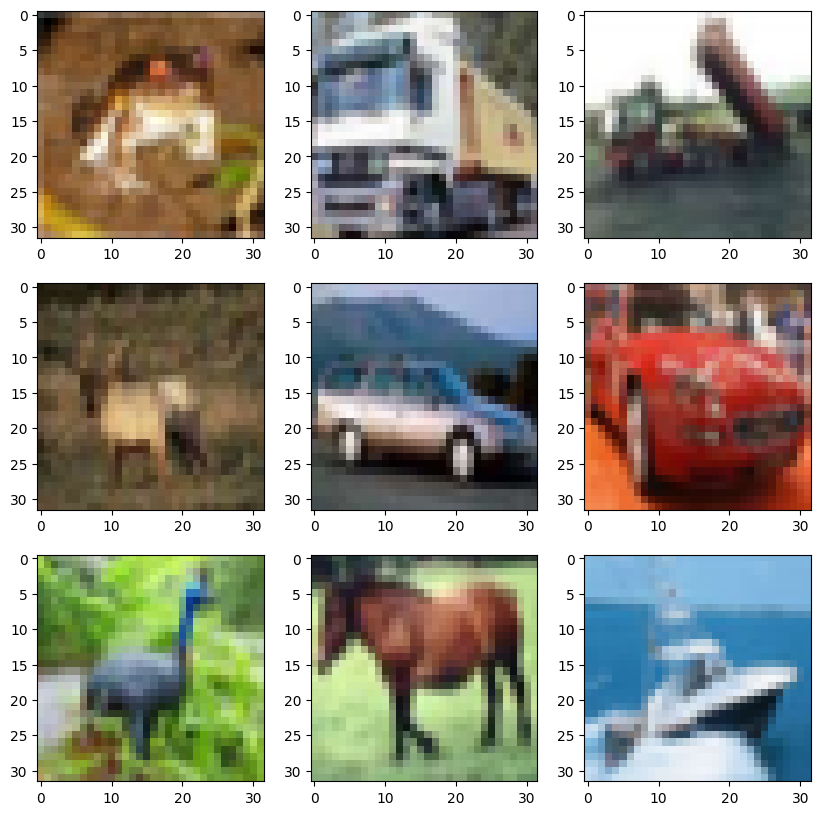

In [7]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
a = 0
for i in range(3):
    for j in range(3):
        ax[i, j].imshow(train_images[a], cmap='gray')
        a += 1

In [18]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

class_names[train_labels[0][0]]

'frog'

In [20]:
validation_images = train_images[:5000] / 255
validation_labels = train_labels[:5000]

train_images_full = train_images
train_labels_full = train_labels

train_images = train_images[5000:] / 255
train_labels = train_labels[5000:]

test_images = test_images / 255

airplane


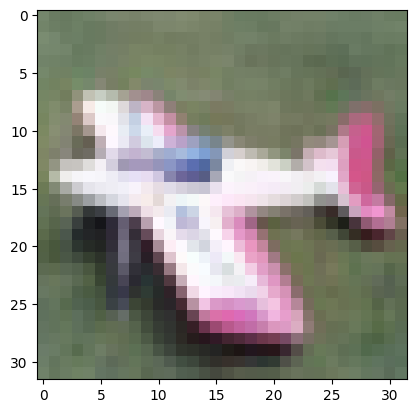

In [22]:
index = 3
print(class_names[train_labels[index][0]])
plt.imshow(train_images[index], cmap='gray')

# Model Time

(but why male models?)

In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(32, 32, 3)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, kernel_initializer='lecun_normal', activation='selu')) # LeCun normal initializer is useful for deep networks
model.add(keras.layers.Dense(300, kernel_initializer='lecun_normal', activation='selu'))
model.add(keras.layers.Dense(300, kernel_initializer='lecun_normal', activation='selu'))
model.add(keras.layers.Dense(300, kernel_initializer='lecun_normal', activation='selu'))
model.add(keras.layers.Dense(300, kernel_initializer='lecun_normal', activation='selu'))
model.add(keras.layers.Dense(10, activation='softmax')) # Softmax is useful for classification problems where each class is independent

I0000 00:00:1729574865.610226   12217 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-21 22:27:45.611549: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       921,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,286,110 (4.91 MB)

 Trainable params: 1,286,110 (4.91 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [26]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [27]:
history = model.fit(train_images, train_labels, epochs=30, validation_data=(validation_images, validation_labels), batch_size=32)

Epoch 1/30


2024-10-21 22:28:18.583802: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 552960000 exceeds 10% of free system memory.


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.2406 - loss: 2.3649 - val_accuracy: 0.3474 - val_loss: 1.8124
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3857 - loss: 1.7012 - val_accuracy: 0.3280 - val_loss: 1.9278
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4283 - loss: 1.5903 - val_accuracy: 0.4330 - val_loss: 1.5710
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4501 - loss: 1.5335 - val_accuracy: 0.3864 - val_loss: 1.7081
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4717 - loss: 1.4712 - val_accuracy: 0.4320 - val_loss: 1.5787
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4871 - loss: 1.4316 - val_accuracy: 0.4266 - val_loss: 1.6314
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5002 - loss: 1.3942 - val_accuracy: 0.4154 - val_loss: 1.6502
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5162 - loss: 1.3514 - val_accurac

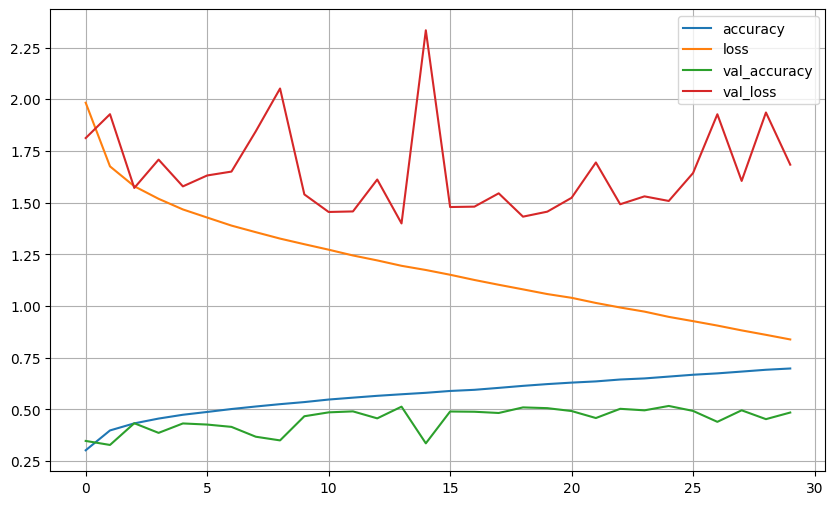

In [30]:
pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.show()

In [38]:
model_dropouts = keras.models.Sequential()
model_dropouts.add(keras.layers.Input(shape=(32, 32, 3)))
model_dropouts.add(keras.layers.Flatten())
model_dropouts.add(keras.layers.Dense(300, kernel_initializer='lecun_normal', activation='selu')) # LeCun normal initializer is useful for deep networks
model_dropouts.add(keras.layers.AlphaDropout(rate=0.1))
model_dropouts.add(keras.layers.Dense(300, kernel_initializer='lecun_normal', activation='selu'))
# model_dropouts.add(keras.layers.AlphaDropout(rate=0.1))
model_dropouts.add(keras.layers.Dense(300, kernel_initializer='lecun_normal', activation='selu'))
# model_dropouts.add(keras.layers.AlphaDropout(rate=0.1))
model_dropouts.add(keras.layers.Dense(300, kernel_initializer='lecun_normal', activation='selu'))
# model_dropouts.add(keras.layers.AlphaDropout(rate=0.1))
model_dropouts.add(keras.layers.Dense(300, kernel_initializer='lecun_normal', activation='selu'))
# model_dropouts.add(keras.layers.AlphaDropout(rate=0.1))
model_dropouts.add(keras.layers.Dense(10, activation='softmax')) # Softmax is useful for classification problems where each class is independent


model_dropouts.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

history_dropouts = model_dropouts.fit(train_images, train_labels, epochs=30, validation_data=(validation_images, validation_labels), batch_size=32)

Epoch 1/30


TypeError: Exception encountered when calling AlphaDropout.call().

[1mgreater_equal() got an unexpected keyword argument 'seed'[0m

Arguments received by AlphaDropout.call():
  • inputs=tf.Tensor(shape=(None, 300), dtype=float32)
  • training=True

In [19]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9737 - loss: 0.0863


[0.07324568182229996, 0.9782000184059143]

In [20]:
model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[5.2701978e-07, 5.0802932e-08, 6.3797503e-05, ..., 9.9953014e-01,
        5.2839516e-07, 1.1517150e-05],
       [7.8457612e-07, 1.1873129e-05, 9.9954849e-01, ..., 5.3240086e-11,
        6.1950391e-06, 8.0504475e-12],
       [4.6565441e-05, 9.9706072e-01, 5.0090218e-04, ..., 1.1889519e-03,
        8.6120574e-04, 1.0989638e-05],
       ...,
       [5.4185559e-11, 3.7954181e-10, 7.0166642e-12, ..., 4.4399690e-06,
        3.3327757e-07, 6.2925542e-06],
       [4.3349171e-08, 5.7055445e-09, 8.2861057e-10, ..., 1.9274780e-09,
        6.5213768e-05, 1.2758308e-09],
       [2.0630458e-07, 4.8887550e-10, 1.5215980e-07, ..., 1.3846544e-12,
        4.8121751e-09, 4.1190143e-10]], dtype=float32)

In [21]:
label_prob = model.predict(test_images)
label_classes = label_prob.argmax(axis=1)
label_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step


array([7, 2, 1, ..., 4, 5, 6])

In [22]:
confusion_matrix = tf.math.confusion_matrix(test_labels, label_classes)

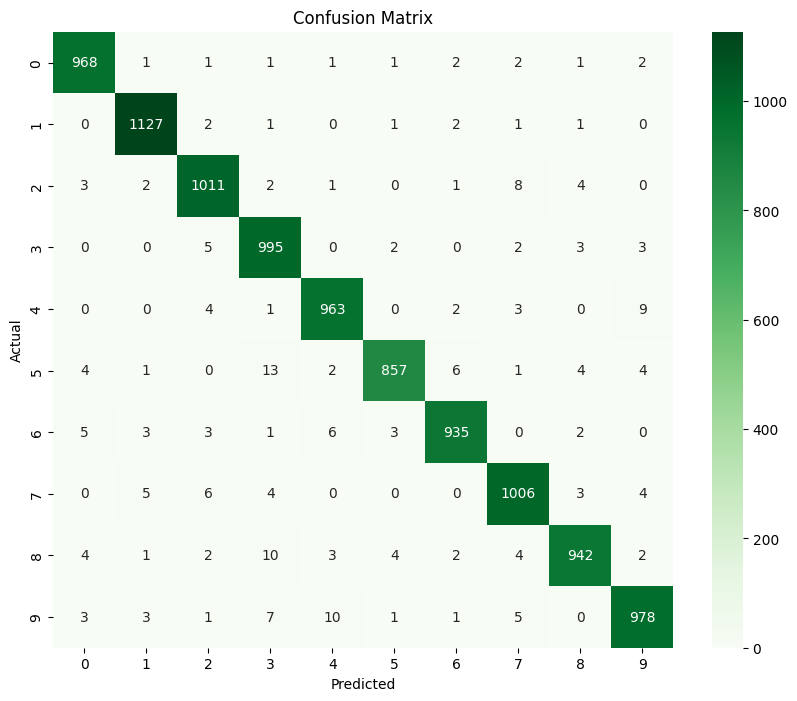

In [23]:
import seaborn as sns

fig = sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Greens')

fig.set_xlabel('Predicted')
fig.set_ylabel('Actual')
fig.set_title('Confusion Matrix')
fig.set_xticklabels(class_names)
fig.set_yticklabels(class_names)
fig.figure.set_size_inches(10, 8)

plt.show()